<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

In [6]:
# Generar un conjunto de datos artificial que siga una distribución gaussiana concéntrica
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# PASO 2: Manipulación de datos


In [7]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X1, Y1, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#PASO 3: Exploración de Datos

         X1        X2  Y
0 -1.140108  0.069384  0
1  1.533599 -0.155701  0
2 -1.559834  1.074086  1
3  1.239134  0.174310  0
4 -2.794104 -0.832874  1
5  1.600366  2.149346  1
6 -1.794438  2.487261  1
7 -2.014312  1.830250  1
8 -0.031621 -1.980564  1
9 -1.691204  3.543991  1


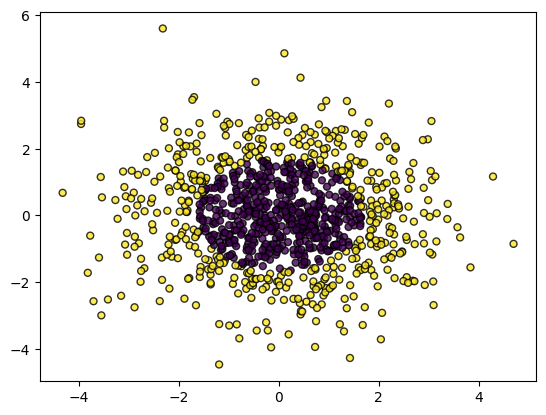

In [ ]:
# Mostrar algunos ejemplos de los datos generados, de forma tabular
import pandas as pd
df = pd.DataFrame(X1, columns=['X1', 'X2'])
df['Clase'] = Y1
print(df.head(10))

# Gráficar los datos, asignando el color roja a una categoria y azul a la otra
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)

# PASO 4: Modelamiento de Datos (Machine Learning)


Reporte de clasificación del modelo inicial:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.99      1.00       104

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Mejores hiperparámetros encontrados:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Reporte de clasificación del mejor modelo en validación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Evaluación final en el conjunto de prueba:

Reporte de clasificación final:
              precision  

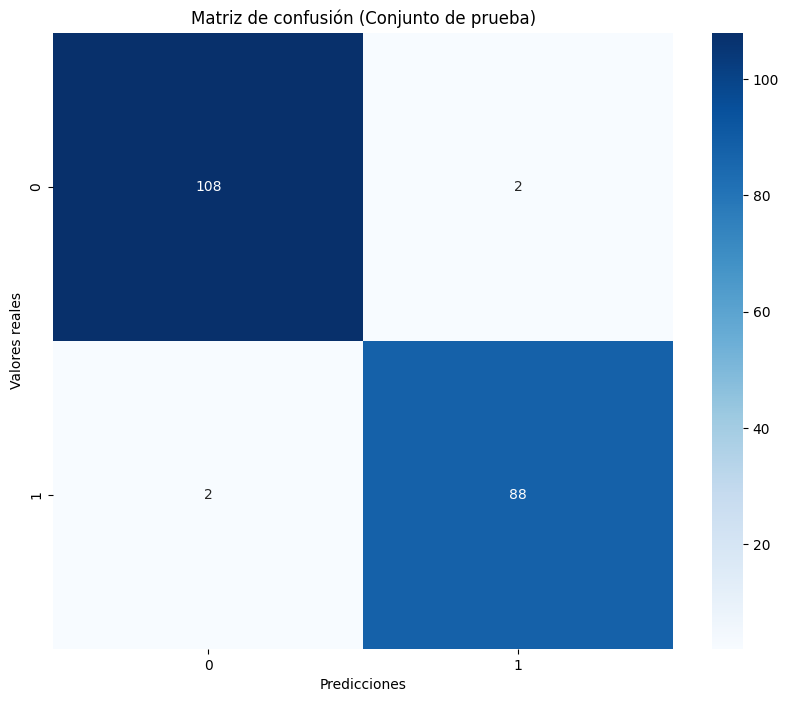

In [9]:
# Entrenar un clasificador SVM con un kernel gaussiano
# Utilizar grid-search para encontrar los mejores hiperparámetros
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Entrenamiento del modelo inicial
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X_train, y_train)

# Evaluación del modelo inicial en el conjunto de validación
y_val_pred = clf.predict(X_val)
print("\nReporte de clasificación del modelo inicial:")
print(classification_report(y_val, y_val_pred))

# Configuración de Grid Search para encontrar los mejores hiperparámetros, usando el conjunto de validación
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Crear el modelo para Grid Search
grid_search = GridSearchCV(
    estimator=svm.SVC(),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='f1_weighted',  # Optimizar para f1-score
    n_jobs=-1,  # Usar todos los procesadores disponibles
    verbose=2
)

# Entrenar el modelo con grid search
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros en el conjunto de validación
best_clf = grid_search.best_estimator_
y_val_pred_best = best_clf.predict(X_val)
print("\nReporte de clasificación del mejor modelo en validación:")
print(classification_report(y_val, y_val_pred_best))

# Solo después de seleccionar el mejor modelo, evaluamos en el conjunto de prueba
print("\n\nEvaluación final en el conjunto de prueba:")
y_test_pred = best_clf.predict(X_test)
print("\nReporte de clasificación final:")
print(classification_report(y_test, y_test_pred))

# Visualizar la matriz de confusión final
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión (Conjunto de prueba)')
plt.show()

#PASO 5: Interpretación de los Resultados

In [ ]:
# Interpretación de los resultados obtenidos y eficacia del modelo
#
# En este laboratorio entrenamos un modelo SVM usando datos artificiales con distribución gaussiana.
# Dividimos los datos en tres conjuntos: entrenamiento, validación y prueba.
# Esto permitió entrenar el modelo, ajustar sus parámetros y evaluarlo de forma justa.
#
# Primero probamos un modelo SVM básico y luego aplicamos Grid Search para encontrar
# los mejores valores de C y gamma, usando solo el conjunto de validación.
#
# Finalmente, evaluamos el mejor modelo en el conjunto de prueba, obteniendo buenos resultados.
# Los puntajes de precisión, recall y F1 fueron altos, y la matriz de confusión mostró pocos errores.
#
# Esto indica que el modelo aprendió bien a clasificar los datos sin sobreajustarse,
# y que el kernel RBF fue una buena elección para separar las clases no lineales.